In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
file_path = "/content/Stocks Analysis and Prediction/SPY_PG_JNJ STOCKS DATA.csv" # Removed the extra .csv from the file path
df = pd.read_csv(file_path)

In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Extract Stock Ticker from StockNumber (e.g., SPY3522 -> SPY)
df['Stock'] = df['StockNumber'].str.extract(r'([A-Za-z]+)')

# Fill missing values in Capital Gains with 0 (or use df.fillna(method='ffill') if preferred)
df['Capital Gains'] = df['Capital Gains'].fillna(0)

# Drop StockNumber column since we extracted the stock name
df.drop(columns=['StockNumber'], inplace=True)

# Display cleaned data
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Stock
0,2023-12-29,469.044336,469.575906,465.904181,467.882782,122234100,0,0,0.0,SPY
1,2023-12-29,141.590178,142.521188,141.328329,142.113861,5300900,0,0,0.0,PG
2,2023-12-29,150.502390,150.877419,149.992735,150.723572,4311100,0,0,0.0,JNJ
3,2023-12-28,469.428244,470.087758,468.817937,469.241211,77158100,0,0,0.0,SPY
4,2023-12-28,141.590172,141.599865,140.659162,141.328323,5023000,0,0,0.0,PG


In [ ]:
# Sort data by Stock and Date
df = df.sort_values(by=['Stock', 'Date'])

# Compute daily returns
df['Daily Return'] = df.groupby('Stock')['Close'].pct_change()

# Display data with daily returns
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Stock,Daily Return
10565,2010-01-04,41.344057,41.522952,41.152386,41.324890,9506200,0,0,0.0,JNJ,NaN
10562,2010-01-05,41.261013,41.286570,40.775438,40.845718,10673100,0,0,0.0,JNJ,-0.011595
10559,2010-01-06,40.826545,41.235449,40.781821,41.177944,13171500,0,0,0.0,JNJ,0.008134
10556,2010-01-07,41.050161,41.114051,40.724316,40.884045,10901600,0,0,0.0,JNJ,-0.007137
10553,2010-01-08,40.839319,41.056552,40.654037,41.024605,7898000,0,0,0.0,JNJ,0.003438


In [ ]:
# Function to compute Moving Averages & RSI
def add_technical_indicators(df):
    for stock in df['Stock'].unique():
        stock_data = df[df['Stock'] == stock].copy()

        # Moving Averages
        stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()  # 20-day SMA
        stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()  # 50-day SMA

        # Relative Strength Index (RSI)
        delta = stock_data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        stock_data['RSI'] = 100 - (100 / (1 + rs))

        # Merge back into main dataset
        df.update(stock_data)

    return df

# Apply function
df = add_technical_indicators(df)

# Display sample data with indicators
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Stock,Daily Return
10565,2010-01-04,41.344057,41.522952,41.152386,41.324890,9506200,0,0,0.0,JNJ,NaN
10562,2010-01-05,41.261013,41.286570,40.775438,40.845718,10673100,0,0,0.0,JNJ,-0.011595
10559,2010-01-06,40.826545,41.235449,40.781821,41.177944,13171500,0,0,0.0,JNJ,0.008134
10556,2010-01-07,41.050161,41.114051,40.724316,40.884045,10901600,0,0,0.0,JNJ,-0.007137
10553,2010-01-08,40.839319,41.056552,40.654037,41.024605,7898000,0,0,0.0,JNJ,0.003438


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
#plt.style.use("seaborn-darkgrid")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style using the correct style name
plt.style.use('seaborn-v0_8-darkgrid')
# Use 'seaborn-v0_8-darkgrid' instead of 'seaborn-darkgrid'

# Rest of your plotting code

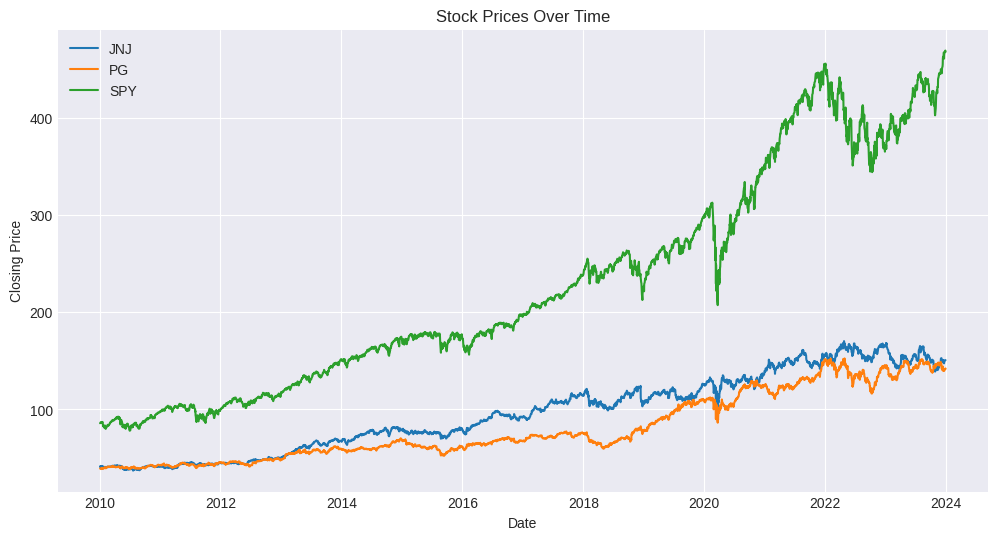

In [ ]:
# stock price over time
# Plot stock closing prices
plt.figure(figsize=(12, 6))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()


<ipython-input-12-20469b3cb4ca>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Stock'] == stock]['Daily Return'].dropna(), label=stock, shade=True)
<ipython-input-12-20469b3cb4ca>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Stock'] == stock]['Daily Return'].dropna(), label=stock, shade=True)
<ipython-input-12-20469b3cb4ca>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Stock'] == stock]['Daily Return'].dropna(), label=stock, shade=True)


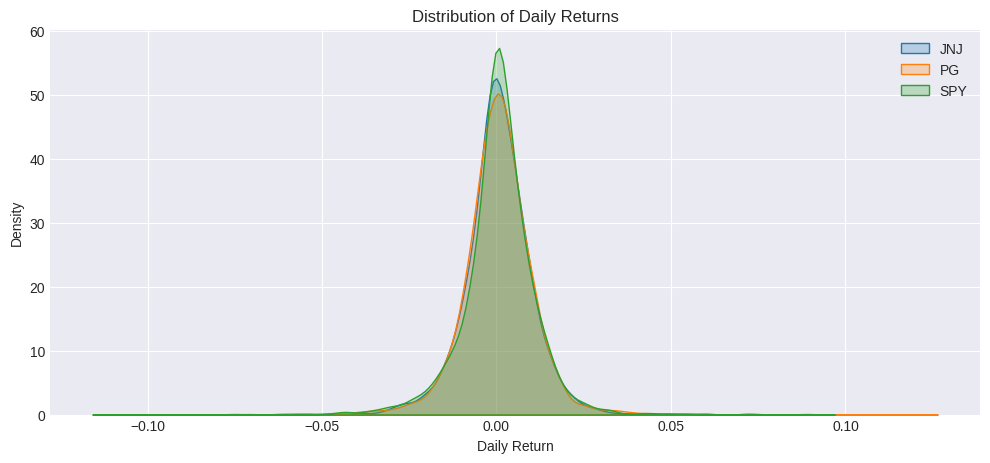

In [ ]:
# Daily return distribution
# Plot daily returns distribution
plt.figure(figsize=(12, 5))
for stock in df['Stock'].unique():
    sns.kdeplot(df[df['Stock'] == stock]['Daily Return'].dropna(), label=stock, shade=True)

plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.title("Distribution of Daily Returns")
plt.legend()
plt.show()


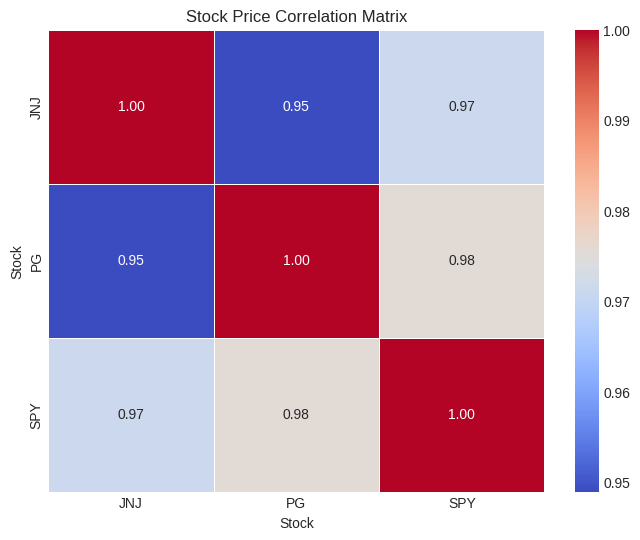

In [ ]:
# correlation between stocks
# Pivot table to get closing prices of each stock
pivot_df = df.pivot(index="Date", columns="Stock", values="Close")

# Compute correlation
corr_matrix = pivot_df.corr()

# Heatmap of stock correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Stock Price Correlation Matrix")
plt.show()


## Volatility Analysis

In [ ]:
# Computing Volatility (Rolling Standard Deviation)
# Define window size for rolling volatility (e.g., 20 days)
window_size = 20

# Compute rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Stock')['Daily Return'].rolling(window=window_size).std().reset_index(level=0, drop=True)


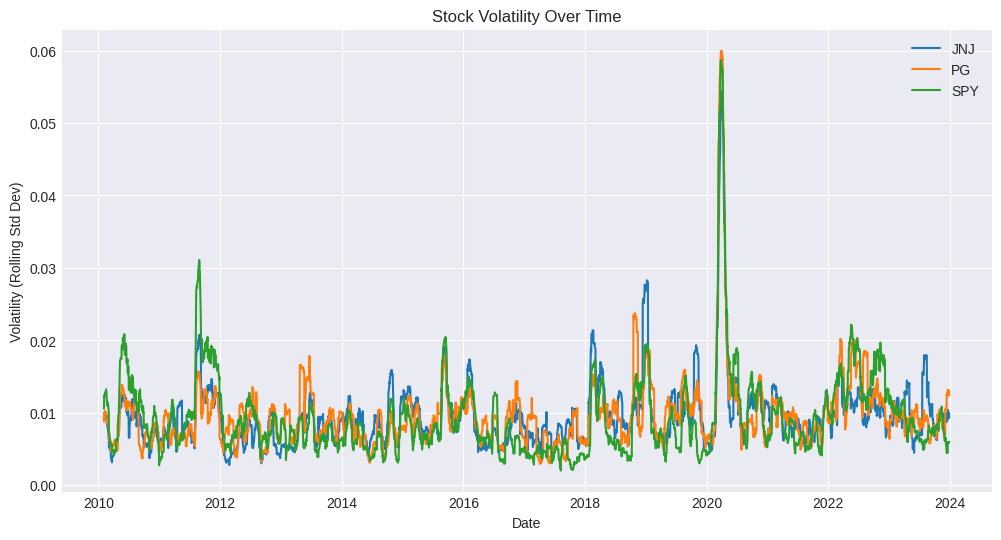

In [ ]:
# Volatility Trend
plt.figure(figsize=(12, 6))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Volatility'], label=stock)

plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.title("Stock Volatility Over Time")
plt.legend()
plt.show()


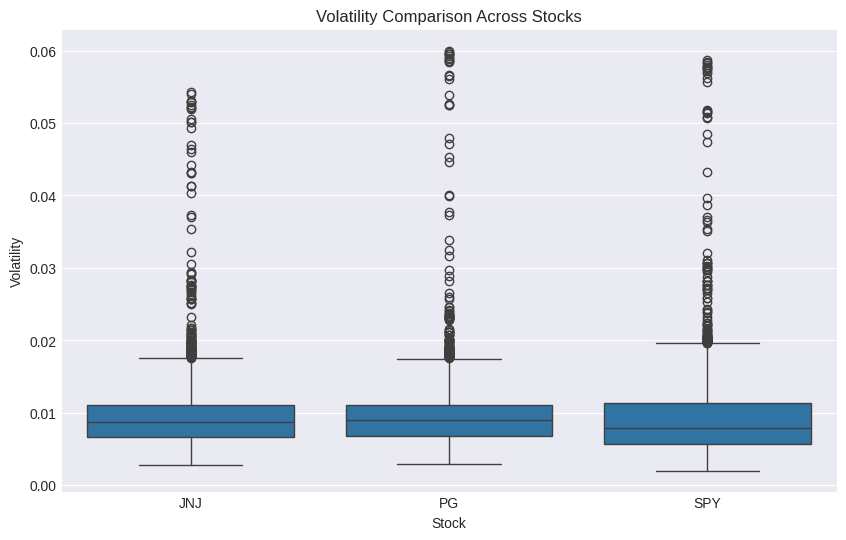

In [ ]:
# Compare Volatility Across Stocks (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Stock", y="Volatility", data=df)
plt.title("Volatility Comparison Across Stocks")
plt.show()


# INVESTIGATING RELATIONSHIP BETWEEN SPY N PG

In [ ]:
# Filter for Data for SPY and PG
# Filter dataset for SPY and PG
df_spy_pg = df[df['Stock'].isin(['SPY', 'PG'])]

# Pivot table to align dates
df_pivot = df_spy_pg.pivot(index="Date", columns="Stock", values="Close").dropna()

# Rename columns for easier access
df_pivot.columns = ['SPY', 'PG']

# Display first few rows
df_pivot.head()


,SPY,PG
Date,,
2010-01-04,39.193016,85.768440
2010-01-05,39.205845,85.995483
2010-01-06,39.019886,86.056030
2010-01-07,38.808277,86.419312
2010-01-08,38.756977,86.706856


In [ ]:
# Daily returns
# Compute daily percentage change (returns)
df_pivot['SPY Returns'] = df_pivot['SPY'].pct_change()
df_pivot['PG Returns'] = df_pivot['PG'].pct_change()

# Drop NaN values after returns calculation
df_pivot.dropna(inplace=True)

# Display sample data
df_pivot.head()


,SPY,PG,SPY Returns,PG Returns
Date,,,,
2010-01-05,39.205845,85.995483,0.000327,0.002647
2010-01-06,39.019886,86.056030,-0.004743,0.000704
2010-01-07,38.808277,86.419312,-0.005423,0.004221
2010-01-08,38.756977,86.706856,-0.001322,0.003327
2010-01-11,38.603081,86.827965,-0.003971,0.001397


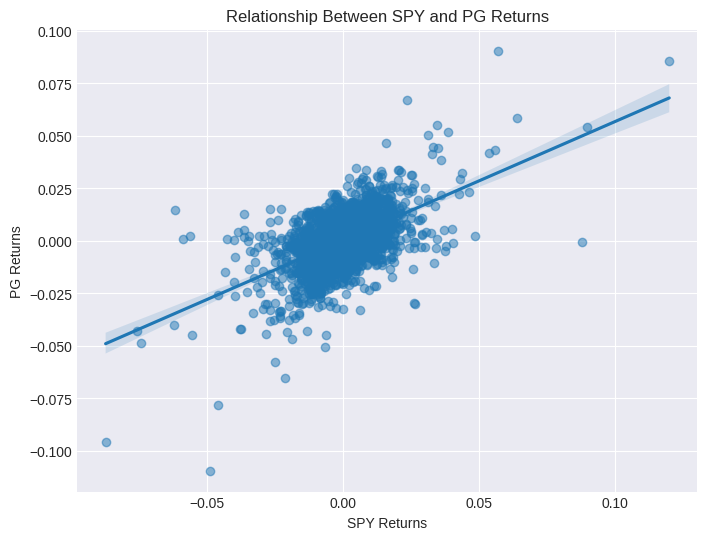

In [ ]:
# SPY vs PG Returns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=df_pivot["SPY Returns"], y=df_pivot["PG Returns"], scatter_kws={'alpha':0.5})
plt.xlabel("SPY Returns")
plt.ylabel("PG Returns")
plt.title("Relationship Between SPY and PG Returns")
plt.show()


In [ ]:
# SPY vs PG Correlation
correlation = df_pivot[['SPY Returns', 'PG Returns']].corr().iloc[0, 1]
print(f"Correlation between SPY and PG: {correlation:.4f}")


Correlation between SPY and PG: 0.5610


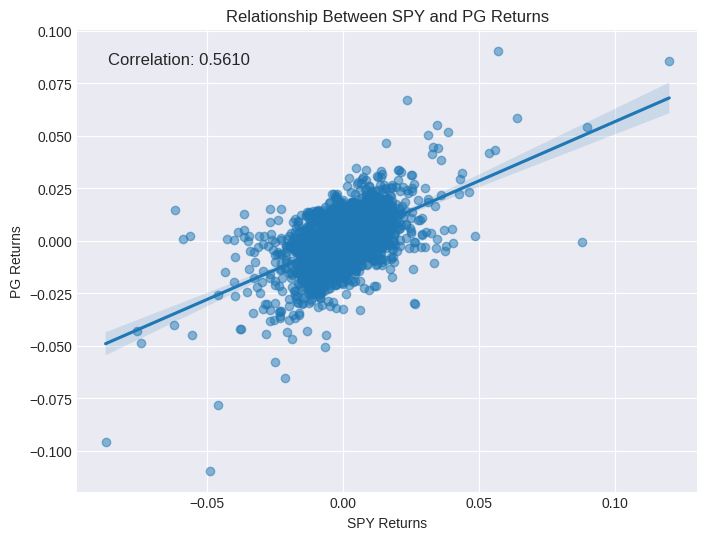

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pivot contains 'SPY Returns' and 'PG Returns' columns

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.regplot(x='SPY Returns', y='PG Returns', data=df_pivot, scatter_kws={'alpha': 0.5})
# alpha controls point transparency

plt.xlabel("SPY Returns")
plt.ylabel("PG Returns")
plt.title("Relationship Between SPY and PG Returns")

# Add correlation to the plot
correlation = df_pivot[['SPY Returns', 'PG Returns']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f"Correlation: {correlation:.4f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')  # Adjust position as needed

plt.show()

Beta of PG relative to SPY: 0.5643


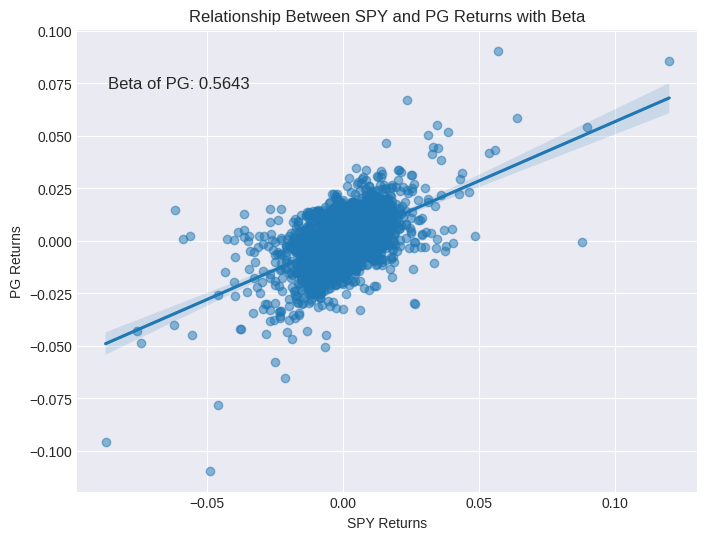

In [ ]:
# Market Sensitivity (BETA)
import numpy as np

# Calculate covariance and variance
covariance = np.cov(df_pivot['SPY Returns'], df_pivot['PG Returns'])[0, 1]
variance_spy = np.var(df_pivot['SPY Returns'])

# Compute Beta
beta_pg = covariance / variance_spy
print(f"Beta of PG relative to SPY: {beta_pg:.4f}")

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='SPY Returns', y='PG Returns', data=df_pivot, scatter_kws={'alpha': 0.5})

# Add Beta value to the plot
plt.text(0.05, 0.90, f"Beta of PG: {beta_pg:.4f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel("SPY Returns")
plt.ylabel("PG Returns")
plt.title("Relationship Between SPY and PG Returns with Beta")

plt.show()

# Investigating Relationships Between SPY (Benchmark) and JNJ



In [ ]:
# Filtering Data for SPY and JNJ
# Filter dataset for SPY and JNJ
df_spy_jnj = df[df['Stock'].isin(['SPY', 'JNJ'])]

# Pivot table to align dates
df_pivot = df_spy_jnj.pivot(index="Date", columns="Stock", values="Close").dropna()

# Rename columns for easier access
df_pivot.columns = ['SPY', 'JNJ']

# Display first few rows
df_pivot.head()


,SPY,JNJ
Date,,
2010-01-04,41.324890,85.768440
2010-01-05,40.845718,85.995483
2010-01-06,41.177944,86.056030
2010-01-07,40.884045,86.419312
2010-01-08,41.024605,86.706856


In [ ]:
# Daily Returns
# Compute daily percentage change (returns)
df_pivot['SPY Returns'] = df_pivot['SPY'].pct_change()
df_pivot['JNJ Returns'] = df_pivot['JNJ'].pct_change()

# Drop NaN values after returns calculation
df_pivot.dropna(inplace=True)

# Display sample data
df_pivot.head()


,SPY,JNJ,SPY Returns,JNJ Returns
Date,,,,
2010-01-05,40.845718,85.995483,-0.011595,0.002647
2010-01-06,41.177944,86.056030,0.008134,0.000704
2010-01-07,40.884045,86.419312,-0.007137,0.004221
2010-01-08,41.024605,86.706856,0.003438,0.003327
2010-01-11,41.030991,86.827965,0.000156,0.001397


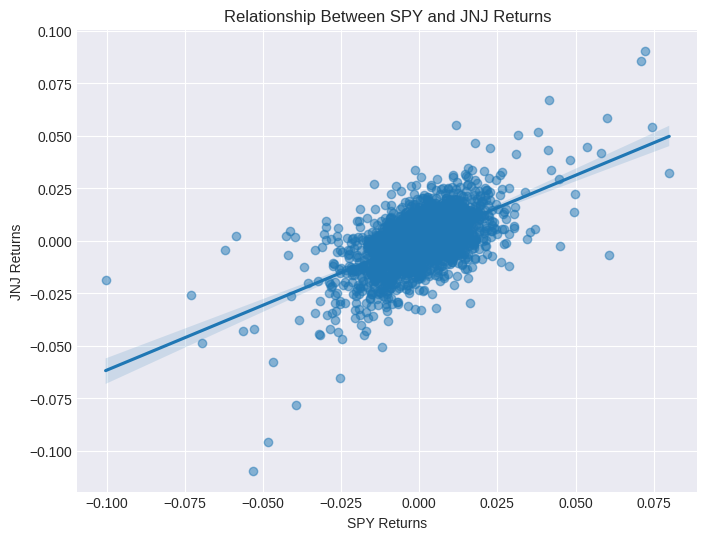

In [ ]:
# SPY vs JNJ
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=df_pivot["SPY Returns"], y=df_pivot["JNJ Returns"], scatter_kws={'alpha':0.5})
plt.xlabel("SPY Returns")
plt.ylabel("JNJ Returns")
plt.title("Relationship Between SPY and JNJ Returns")
plt.show()


In [ ]:
# Correlation between SPY and JNJ
correlation = df_pivot[['SPY Returns', 'JNJ Returns']].corr().iloc[0, 1]
print(f"Correlation between SPY and JNJ: {correlation:.4f}")


Correlation between SPY and JNJ: 0.6003


In [ ]:
# Market Sensitivity (BETA)
import numpy as np

# Calculate covariance and variance
covariance = np.cov(df_pivot['SPY Returns'], df_pivot['JNJ Returns'])[0, 1]
variance_spy = np.var(df_pivot['SPY Returns'])

# Compute Beta
beta_jnj = covariance / variance_spy
print(f"Beta of JNJ relative to SPY: {beta_jnj:.4f}")


Beta of JNJ relative to SPY: 0.6188


**# Compare JNJ and PG Relative to SPY**

In [ ]:
# Daily Returns for SPY, PG, and JNJ
# Filter dataset for SPY, PG, and JNJ
df_spy_pg_jnj = df[df['Stock'].isin(['SPY', 'PG', 'JNJ'])]

# Pivot table to align dates
df_pivot = df_spy_pg_jnj.pivot(index="Date", columns="Stock", values="Close").dropna()

# Rename columns
df_pivot.columns = ['SPY', 'JNJ', 'PG']

# Compute daily returns
df_pivot['SPY Returns'] = df_pivot['SPY'].pct_change()
df_pivot['JNJ Returns'] = df_pivot['JNJ'].pct_change()
df_pivot['PG Returns'] = df_pivot['PG'].pct_change()

# Drop NaN values after returns calculation
df_pivot.dropna(inplace=True)

# Display sample data
df_pivot.head()


,SPY,JNJ,PG,SPY Returns,JNJ Returns,PG Returns
Date,,,,,,
2010-01-05,40.845718,39.205845,85.995483,-0.011595,0.000327,0.002647
2010-01-06,41.177944,39.019886,86.056030,0.008134,-0.004743,0.000704
2010-01-07,40.884045,38.808277,86.419312,-0.007137,-0.005423,0.004221
2010-01-08,41.024605,38.756977,86.706856,0.003438,-0.001322,0.003327
2010-01-11,41.030991,38.603081,86.827965,0.000156,-0.003971,0.001397


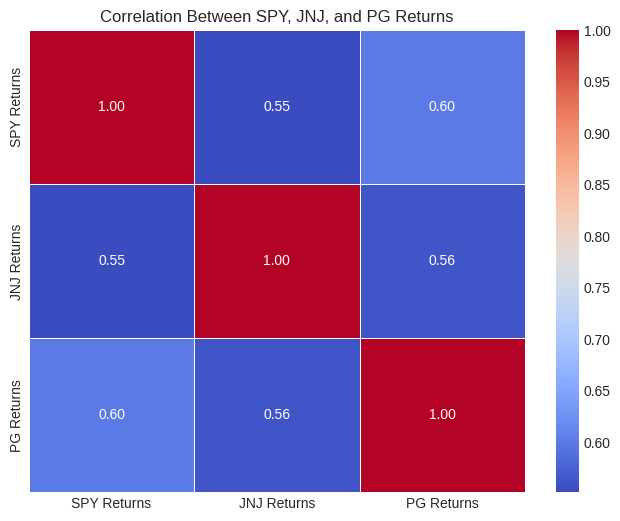

In [ ]:
# Correlations of PG and JNJ with SPY
# Compute correlation matrix
corr_matrix = df_pivot[['SPY Returns', 'JNJ Returns', 'PG Returns']].corr()

# Display correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between SPY, JNJ, and PG Returns")
plt.show()


In [ ]:
# Compare Beta values of PG and JNJ
#import numpy as np

# Compute Beta for PG
cov_pg = np.cov(df_pivot['SPY Returns'], df_pivot['PG Returns'])[0, 1]
beta_pg = cov_pg / np.var(df_pivot['SPY Returns'])

# Compute Beta for JNJ
cov_jnj = np.cov(df_pivot['SPY Returns'], df_pivot['JNJ Returns'])[0, 1]
beta_jnj = cov_jnj / np.var(df_pivot['SPY Returns'])

print(f"Beta of PG relative to SPY: {beta_pg:.4f}")
print(f"Beta of JNJ relative to SPY: {beta_jnj:.4f}")


Beta of PG relative to SPY: 0.6188
Beta of JNJ relative to SPY: 0.5651


Interpretation
Correlation: Determines how PG and JNJ move with SPY.

Beta: Measures how volatile PG and JNJ are compared to SPY.

Beta > 1: More volatile than SPY.

Beta < 1: Less volatile than SPY.



### Build a Regression Model to Predict JNJ Returns Using SPY

In [ ]:
# Train a LR model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define X (SPY Returns) and Y (JNJ Returns)
X = df_pivot[['SPY Returns']]
y = df_pivot['JNJ Returns']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")
print(f"Regression Coefficient (Beta): {model.coef_[0]:.4f}")


R² Score: 0.3480
Mean Squared Error: 0.000081
Regression Coefficient (Beta): 0.5488


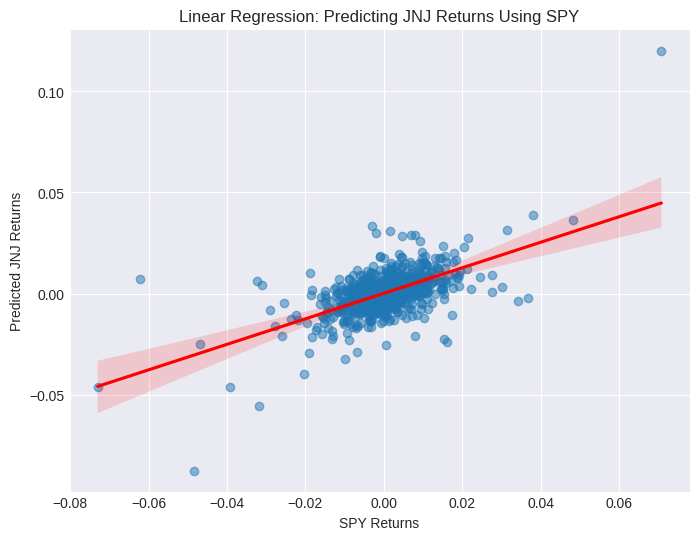

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['SPY Returns'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel("SPY Returns")
plt.ylabel("Predicted JNJ Returns")
plt.title("Linear Regression: Predicting JNJ Returns Using SPY")
plt.show()


### Build a Regression Model for PG Using SPY

In [ ]:
# Define X (SPY Returns) and Y (PG Returns)
X_pg = df_pivot[['SPY Returns']]
y_pg = df_pivot['PG Returns']

# Split data into training and testing sets (80% train, 20% test)
X_train_pg, X_test_pg, y_train_pg, y_test_pg = train_test_split(X_pg, y_pg, test_size=0.2, random_state=42)

# Train the model
model_pg = LinearRegression()
model_pg.fit(X_train_pg, y_train_pg)

# Make predictions
y_pred_pg = model_pg.predict(X_test_pg)

# Evaluate the model
r2_pg = r2_score(y_test_pg, y_pred_pg)
mse_pg = mean_squared_error(y_test_pg, y_pred_pg)

print(f"PG Regression Model:")
print(f"R² Score: {r2_pg:.4f}")
print(f"Mean Squared Error: {mse_pg:.6f}")
print(f"Regression Coefficient (Beta): {model_pg.coef_[0]:.4f}")


PG Regression Model:
R² Score: 0.3820
Mean Squared Error: 0.000089
Regression Coefficient (Beta): 0.5952


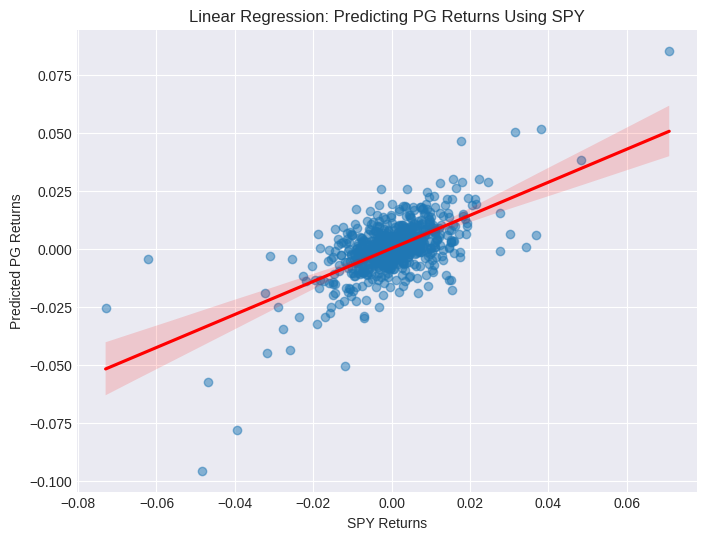

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test_pg['SPY Returns'], y=y_test_pg, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel("SPY Returns")
plt.ylabel("Predicted PG Returns")
plt.title("Linear Regression: Predicting PG Returns Using SPY")
plt.show()


             SPY Returns  JNJ Returns  PG Returns
SPY Returns     1.000000     0.551218    0.600272
JNJ Returns     0.551218     1.000000    0.561047
PG Returns      0.600272     0.561047    1.000000
Beta of PG relative to SPY: 0.6188
Beta of JNJ relative to SPY: 0.5651


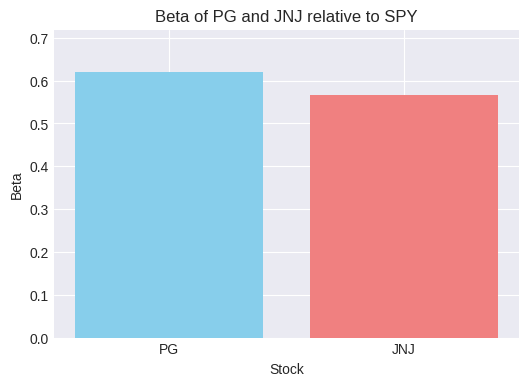

PG is more volatile than JNJ relative to SPY.
PG has a stronger correlation with SPY.


In [ ]:
# prompt: from the above analysis, between PG and JNJ which is better compared SPY, also give visualization

import matplotlib.pyplot as plt
import numpy as np
# Assuming df_pivot is already created as in the provided code

# Correlations of PG and JNJ with SPY
corr_matrix = df_pivot[['SPY Returns', 'JNJ Returns', 'PG Returns']].corr()
print(corr_matrix)

# Compare Beta values of PG and JNJ
cov_pg = np.cov(df_pivot['SPY Returns'], df_pivot['PG Returns'])[0, 1]
beta_pg = cov_pg / np.var(df_pivot['SPY Returns'])

cov_jnj = np.cov(df_pivot['SPY Returns'], df_pivot['JNJ Returns'])[0, 1]
beta_jnj = cov_jnj / np.var(df_pivot['SPY Returns'])

print(f"Beta of PG relative to SPY: {beta_pg:.4f}")
print(f"Beta of JNJ relative to SPY: {beta_jnj:.4f}")

# Visualization: Bar plot for Beta comparison
plt.figure(figsize=(6, 4))
plt.bar(['PG', 'JNJ'], [beta_pg, beta_jnj], color=['skyblue', 'lightcoral'])
plt.xlabel("Stock")
plt.ylabel("Beta")
plt.title("Beta of PG and JNJ relative to SPY")
plt.ylim(0, max(beta_pg, beta_jnj) + 0.1) # set y-axis limit for better visualization
plt.show()

# Interpretation based on Beta and Correlation:
if beta_pg > beta_jnj:
    print("PG is more volatile than JNJ relative to SPY.")
elif beta_pg < beta_jnj:
    print("JNJ is more volatile than PG relative to SPY.")
else:
    print("PG and JNJ have similar volatility relative to SPY.")

if abs(corr_matrix.loc['SPY Returns', 'PG Returns']) > abs(corr_matrix.loc['SPY Returns', 'JNJ Returns']):
    print("PG has a stronger correlation with SPY.")
elif abs(corr_matrix.loc['SPY Returns', 'PG Returns']) < abs(corr_matrix.loc['SPY Returns', 'JNJ Returns']):
    print("JNJ has a stronger correlation with SPY.")
else:
    print("PG and JNJ have similar correlation with SPY.")

